In [2]:
import pandas as pd
import random
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.tree import DecisionTreeClassifier

# plt.rcParams["figure.figsize"] = (14,4)

from tqdm import tqdm
import time

### Load Data

In [3]:
# main data

# Korea
kospi = pd.read_csv('./data/main_index/kospi(1990.01.02-2023.03.15).csv', sep='|', thousands = ',')
kospi = kospi[['Date','Close']]
kosdaq = pd.read_csv('./data/main_index/kosdaq(2001.01.02-2023.03.15).csv', sep='|', thousands = ',')
kosdaq = kosdaq[['Date','Close']]

# US
dow = pd.read_csv('./data/main_index/dow(2001.01.02-2023.03.15).csv', sep='|', thousands = ',')
dow = dow[['Date','Close']]
sp500 = pd.read_csv('./data/main_index/sp500(2001.01.02-2023.03.15).csv', sep='|', thousands = ',')
sp500 = sp500[['Date','Close']]
russel2000 = pd.read_csv('./data/main_index/russel2000(2001.01.03-2023.03.15).csv', sep='|', thousands = ',')
russel2000 = russel2000[['Date','Close']]
nasdaq = pd.read_csv('./data/main_index/nasdaq(2001.01.02-2023.03.15).csv', sep='|', thousands = ',')
nasdaq = nasdaq[['Date','Close']]
ftse = pd.read_csv('./data/main_index/FTSE(2004.03.05-2023.03.15).csv', sep='|', thousands = ',')
ftse = ftse[['Date','Close']]

# Japan
nikkie = pd.read_csv('./data/main_index/nikkie(2001.01.05-2023.03.15).csv', sep='|', thousands = ',')
nikkie = nikkie[['Date','Close']]

# China
ssec = pd.read_csv('./data/main_index/SSEC(1990.12.20-2023.03.15).csv', sep='|', thousands = ',')
ssec = ssec[['Date','Close']]
szse = pd.read_csv('./data/main_index/SZSE(1995.1.24-2023.03.15).csv', sep='|', thousands = ',')
szse = szse[['Date','Close']]
hsi = pd.read_csv('./data/main_index/hsi(2000.12.05-2023.03.15).csv', sep='|', thousands = ',')
hsi = hsi[['Date','Close']]

In [4]:
# bond_yield data

chi_bond_yield_1 = pd.read_csv('./data/bond_yield/china_1year_bond_yield(2002.06.04-2023.03.15).csv', sep='|', thousands = ',')
chi_bond_yield_1 = chi_bond_yield_1[['Date', 'Close']]
chi_bond_yield_3 = pd.read_csv('./data/bond_yield/china_3year_bond_yield(2000.09.22-2023.03.15).csv', sep='|', thousands = ',')
chi_bond_yield_3 = chi_bond_yield_3[['Date', 'Close']]
chi_bond_yield_5 = pd.read_csv('./data/bond_yield/china_5year_bond_yield(2001.03.14-2023.03.15).csv', sep='|', thousands = ',')
chi_bond_yield_5 = chi_bond_yield_5[['Date', 'Close']]
chi_bond_yield_10 = pd.read_csv('./data/bond_yield/china_10year_bond_yield(2002.06.06-2023.03.15).csv', sep='|', thousands = ',')
chi_bond_yield_10 = chi_bond_yield_10[['Date', 'Close']]

jap_bond_yield_1 = pd.read_csv('./data/bond_yield/japan_1year_bond_yield(2006.07.19-2023.03.15).csv', sep='|', thousands = ',')
jap_bond_yield_1 = jap_bond_yield_1[['Date', 'Close']]
jap_bond_yield_3 = pd.read_csv('./data/bond_yield/japan_3year_bond_yield(2006.07.19-2023.03.15).csv', sep='\t', thousands = ',')
jap_bond_yield_3 = jap_bond_yield_3[['Date', 'Close']]
jap_bond_yield_5 = pd.read_csv('./data/bond_yield/japan_5year_bond_yield(2006.07.27-2023.03.15).csv', sep='\t', thousands = ',')
jap_bond_yield_5 = jap_bond_yield_5[['Date', 'Close']]
jap_bond_yield_10 = pd.read_csv('./data/bond_yield/japan_10year_bond_yield(2006.07.19-2023.03.15).csv', sep='\t', thousands = ',')
jap_bond_yield_10 = jap_bond_yield_10[['Date', 'Close']]

kor_bond_yield_1 = pd.read_csv('./data/bond_yield/korea_1year_bond_yield(1995.05.03-2023.03.15).csv', sep='|', thousands = ',')
kor_bond_yield_1 = kor_bond_yield_1[['Date', 'Close']]
kor_bond_yield_3 = pd.read_csv('./data/bond_yield/korea_3year_bond_yield(1995.05.03-2023.03.15).csv', sep='|', thousands = ',')
kor_bond_yield_3 = kor_bond_yield_3[['Date', 'Close']]
kor_bond_yield_5 = pd.read_csv('./data/bond_yield/korea_5year_bond_yield(1995.05.03-2023.03.15).csv', sep='|', thousands = ',')
kor_bond_yield_5 = kor_bond_yield_5[['Date', 'Close']]
kor_bond_yield_10 = pd.read_csv('./data/bond_yield/korea_10year_bond_yield(2000.10.26-2023.03.15).csv', sep='|', thousands = ',')
kor_bond_yield_10 = kor_bond_yield_10[['Date', 'Close']]

us_bond_yield_1 = pd.read_csv('./data/bond_yield/us_1year_bond_yield(2008.06.05-2023.03.15).csv', sep='|', thousands = ',')
us_bond_yield_1 = us_bond_yield_1[['Date', 'Close']]
us_bond_yield_3 = pd.read_csv('./data/bond_yield/us_3year_bond_yield(1990.01.08-2023.03.15).csv', sep='|', thousands = ',')
us_bond_yield_3 = us_bond_yield_3[['Date', 'Close']]
us_bond_yield_5 = pd.read_csv('./data/bond_yield/us_5year_bond_yield(1990.01.08-2023.03.15).csv', sep='|', thousands = ',')
us_bond_yield_5 = us_bond_yield_5[['Date', 'Close']]
us_bond_yield_10 = pd.read_csv('./data/bond_yield/us_10year_bond_yield(1990.01.08-2023.03.15).csv', sep='|', thousands = ',')
us_bond_yield_10 = us_bond_yield_10[['Date', 'Close']]

In [5]:
# cpi data
'''
chi_cpi_m = pd.read_csv('./data/cpi/china_cpi_compare_last_month(1996.01-2023.02).csv', sep='|', thousands = ',')
chi_cpi_y = pd.read_csv('./data/cpi/china_cpi_compare_last_year(1990.01-2023.02).csv', sep='|', thousands = ',')

jap_c_cpi_y = pd.read_csv('./data/cpi/japan_core_cpi_compare_last_year(1990.01-2023.02).csv', sep='|', thousands = ',')
jap_cpi_y = pd.read_csv('./data/cpi/japan_cpi_compare_last_year(1990.01-2023.02).csv', sep='|', thousands = ',')

kor_cpi_m = pd.read_csv('./data/cpi/korea_cpi_compare_last_month(1990.01-2023.02).csv', sep='|', thousands = ',')
kor_cpi_y = pd.read_csv('./data/cpi/korea_cpi_compare_last_year(1990.01-2023.02).csv', sep='|', thousands = ',')

us_c_cpi_m = pd.read_csv('./data/cpi/us_core_cpi_compare_last_month(1990.01-2023.02).csv', sep='|', thousands = ',')
us_c_cpi_y = pd.read_csv('./data/cpi/us_core_cpi_compare_last_year(1990.01-2023.02).csv', sep='|', thousands = ',')
us_cpi_m = pd.read_csv('./data/cpi/us_cpi_compare_last_month(1990.01-2023.02).csv', sep='|', thousands = ',')
us_cpi_y = pd.read_csv('./data/cpi/us_cpi_compare_last_year(1990.01-2023.02).csv', sep='|', thousands = ',')
'''

chi_cpi_m = pd.read_csv('./data/extract_data(cpi,unem,interest)/chi_cpi_m_data_extract.csv', sep='|', thousands = ',')
chi_cpi_y = pd.read_csv('./data/extract_data(cpi,unem,interest)/chi_cpi_y_data_extract.csv', sep='|', thousands = ',')

jap_c_cpi_y = pd.read_csv('./data/extract_data(cpi,unem,interest)/jap_c_cpi_y_data_extract.csv', sep='|', thousands = ',')
jap_cpi_y = pd.read_csv('./data/extract_data(cpi,unem,interest)/jap_cpi_y_data_extract.csv', sep='|', thousands = ',')

kor_cpi_m = pd.read_csv('./data/extract_data(cpi,unem,interest)/kor_cpi_m_data_extract.csv', sep='|', thousands = ',')
kor_cpi_y = pd.read_csv('./data/extract_data(cpi,unem,interest)/kor_cpi_y_data_extract.csv', sep='|', thousands = ',')

us_c_cpi_m = pd.read_csv('./data/extract_data(cpi,unem,interest)/us_c_cpi_m_data_extract.csv', sep='|', thousands = ',')
us_c_cpi_y = pd.read_csv('./data/extract_data(cpi,unem,interest)/us_c_cpi_y_data_extract.csv', sep='|', thousands = ',')
us_cpi_m = pd.read_csv('./data/extract_data(cpi,unem,interest)/us_cpi_m_data_extract.csv', sep='|', thousands = ',')
us_cpi_y = pd.read_csv('./data/extract_data(cpi,unem,interest)/us_cpi_y_data_extract.csv', sep='|', thousands = ',')

In [6]:
# oil + dollar + gold + unemployment + usd_krw + vix

brent = pd.read_csv('./data/oil/brent(1990.01.02-2023.03.15).csv', sep='|', thousands = ',')
brent = brent[['Date', 'Close']]
dubai = pd.read_csv('./data/oil/dubai(2014.04.28-2023.03.15).csv', sep='|', thousands = ',')
dubai = dubai[['Date', 'Close']]
wti = pd.read_csv('./data/oil/wti(1990.01.02-2023.03.15).csv', sep='|', thousands = ',')
wti = wti[['Date', 'Close']]

bitcoin = pd.read_csv('./data/other/bitcoin(2010.07.18-2023.03.15).csv', sep='|', thousands = ',')
bitcoin = bitcoin[['Date', 'Close']]

dollar = pd.read_csv('./data/other/dollar_index(1990.01.01-2023.03.15).csv', sep='|', thousands = ',')
dollar = dollar[['Date', 'Close']]
gold = pd.read_csv('./data/other/gold_index(1990.01.02-2023.03.15).csv', sep='\t', thousands = ',')
gold = gold[['Date', 'Close']]

# kor_unem = pd.read_csv('./data/other/kor_unemployment_rate(1999.06-2023.03).csv', sep='|', thousands = ',')
# kor_unem = kor_unem[['Date', 'Value']]
# kor_unem.rename(columns = {'Value':'Close'}, inplace=True)
# kor_interest = pd.read_csv('./data/other/kor_interest(1999.05-2023.03).csv', sep='|', thousands = ',')
# kor_interest = kor_interest[['Date', 'Value']]
# kor_interest.rename(columns = {'Value':'Close'}, inplace=True)
# ja_unem = pd.read_csv('./data/other/japan_unemployment_rate(1999.09-2023.02)_날짜수정.csv', sep='|')
# us_unem = pd.read_csv('./data/other/us_unemployment_rate(1990.01-2023.03).csv', sep='|', thousands = ',')
# us_unem = us_unem[['Date', 'Value']]
# us_unem.rename(columns = {'Value':'Close'}, inplace=True)

us_unem = pd.read_csv('./data/extract_data(cpi,unem,interest)/us_unem_data_extract.csv', sep='|', thousands = ',')
kor_unem = pd.read_csv('./data/extract_data(cpi,unem,interest)/kor_unem_data_extract.csv', sep='|', thousands = ',')
kor_interest = pd.read_csv('./data/extract_data(cpi,unem,interest)/kor_interest_data_extract.csv', sep='|', thousands = ',')

usd_krw = pd.read_csv('./data/other/USD_KRW(1990.01-2023.03.15).csv', sep='|', thousands = ',')
usd_krw = usd_krw[['Date', 'Close']]

vix = pd.read_csv('./data/other/vix(1990.01.03-2023.03.15).csv', sep='|', thousands = ',')
vix = vix[['Date', 'Close']]

### Data Preprocessing

In [7]:
kospi.rename(columns = lambda x : 'kospi_' + x if x != 'Date' else x, inplace = True)
kosdaq.rename(columns = lambda x : 'kosdaq_' + x if x != 'Date' else x, inplace = True)
dow.rename(columns = lambda x : 'dow_' + x if x != 'Date' else x, inplace = True)
sp500.rename(columns = lambda x : 'sp500_' + x if x != 'Date' else x, inplace = True)
russel2000.rename(columns = lambda x : 'russel2000_' + x if x != 'Date' else x, inplace = True)
nasdaq.rename(columns = lambda x : 'nasdaq_' + x if x != 'Date' else x, inplace = True)
ftse.rename(columns = lambda x : 'ftse_' + x if x != 'Date' else x, inplace = True)
ftse.dropna(inplace=True)
nikkie.rename(columns = lambda x : 'nikkie_' + x if x != 'Date' else x, inplace = True)
nikkie.dropna(inplace=True)
ssec.rename(columns = lambda x : 'ssec_' + x if x != 'Date' else x, inplace = True)
szse.rename(columns = lambda x : 'szse_' + x if x != 'Date' else x, inplace = True)
hsi.rename(columns = lambda x : 'hsi_' + x if x != 'Date' else x, inplace = True)
hsi.dropna(inplace=True)

chi_bond_yield_1.rename(columns = lambda x : 'chi_bond_yield_1_' + x if x != 'Date' else x, inplace = True)
chi_bond_yield_3.rename(columns = lambda x : 'chi_bond_yield_3_' + x if x != 'Date' else x, inplace = True)
chi_bond_yield_5.rename(columns = lambda x : 'chi_bond_yield_5_' + x if x != 'Date' else x, inplace = True)
chi_bond_yield_10.rename(columns = lambda x : 'chi_bond_yield_10_' + x if x != 'Date' else x, inplace = True)
chi_bond_yield_10.dropna(inplace=True)

jap_bond_yield_1.rename(columns = lambda x : 'jap_bond_yield_1_' + x if x != 'Date' else x, inplace = True)
jap_bond_yield_3.rename(columns = lambda x : 'jap_bond_yield_3_' + x if x != 'Date' else x, inplace = True)
jap_bond_yield_5.rename(columns = lambda x : 'jap_bond_yield_5_' + x if x != 'Date' else x, inplace = True)
jap_bond_yield_10.rename(columns = lambda x : 'jap_bond_yield_10_' + x if x != 'Date' else x, inplace = True)

kor_bond_yield_1.rename(columns = lambda x : 'kor_bond_yield_1_' + x if x != 'Date' else x, inplace = True)
kor_bond_yield_3.rename(columns = lambda x : 'kor_bond_yield_3_' + x if x != 'Date' else x, inplace = True)
kor_bond_yield_5.rename(columns = lambda x : 'kor_bond_yield_5_' + x if x != 'Date' else x, inplace = True)
kor_bond_yield_10.rename(columns = lambda x : 'kor_bond_yield_10_' + x if x != 'Date' else x, inplace = True)

us_bond_yield_1.rename(columns = lambda x : 'us_bond_yield_1_' + x if x != 'Date' else x, inplace = True)
us_bond_yield_3.rename(columns = lambda x : 'us_bond_yield_3_' + x if x != 'Date' else x, inplace = True)
us_bond_yield_5.rename(columns = lambda x : 'us_bond_yield_5_' + x if x != 'Date' else x, inplace = True)
us_bond_yield_5.dropna(inplace=True)
us_bond_yield_10.rename(columns = lambda x : 'us_bond_yield_10_' + x if x != 'Date' else x, inplace = True)

chi_cpi_m.rename(columns = lambda x : 'chi_cpi_m_' + x if x != 'Date' else x, inplace = True)
chi_cpi_y.rename(columns = lambda x : 'chi_cpi_y_' + x if x != 'Date' else x, inplace = True)
jap_c_cpi_y.rename(columns = lambda x : 'jap_c_cpi_y_' + x if x != 'Date' else x, inplace = True)
jap_cpi_y.rename(columns = lambda x : 'jap_cpi_y_' + x if x != 'Date' else x, inplace = True)
kor_cpi_m.rename(columns = lambda x : 'kor_cpi_m_' + x if x != 'Date' else x, inplace = True)
kor_cpi_y.rename(columns = lambda x : 'kor_cpi_y_' + x if x != 'Date' else x, inplace = True)
us_c_cpi_m.rename(columns = lambda x : 'us_c_cpi_m_' + x if x != 'Date' else x, inplace = True)
us_c_cpi_y.rename(columns = lambda x : 'us_c_cpi_y_' + x if x != 'Date' else x, inplace = True)
us_cpi_m.rename(columns = lambda x : 'us_cpi_m_' + x if x != 'Date' else x, inplace = True)
us_cpi_y.rename(columns = lambda x : 'us_cpi_y_' + x if x != 'Date' else x, inplace = True)

brent.rename(columns = lambda x : 'brent_' + x if x != 'Date' else x, inplace = True)
dubai.rename(columns = lambda x : 'dubai_' + x if x != 'Date' else x, inplace = True)
wti.rename(columns = lambda x : 'wti_' + x if x != 'Date' else x, inplace = True)

bitcoin.rename(columns = lambda x : 'bitcoin_' + x if x != 'Date' else x, inplace = True)
dollar.rename(columns = lambda x : 'dollar_' + x if x != 'Date' else x, inplace = True)
gold.rename(columns = lambda x : 'gold_' + x if x != 'Date' else x, inplace = True)
kor_unem.rename(columns = lambda x : 'kor_unem_' + x if x != 'Date' else x, inplace = True)
us_unem.rename(columns = lambda x : 'us_unem_' + x if x != 'Date' else x, inplace = True)
kor_interest.rename(columns = lambda x : 'kor_interest_' + x if x != 'Date' else x, inplace = True)
usd_krw.rename(columns = lambda x : 'usd_krw_' + x if x != 'Date' else x, inplace = True)
vix.rename(columns = lambda x : 'vix_' + x if x != 'Date' else x, inplace = True)


In [11]:
variables = [kospi, kosdaq, dow, sp500, russel2000, nasdaq, ftse, nikkie, ssec, szse, hsi, 
             chi_bond_yield_1, chi_bond_yield_3, chi_bond_yield_5, chi_bond_yield_10,
             jap_bond_yield_1, jap_bond_yield_3, jap_bond_yield_5, jap_bond_yield_10,
             kor_bond_yield_1, kor_bond_yield_3, kor_bond_yield_5, kor_bond_yield_10, kor_unem,
             us_bond_yield_1, us_bond_yield_3, us_bond_yield_5, us_bond_yield_10,
             chi_cpi_m, chi_cpi_y, jap_c_cpi_y, jap_cpi_y, kor_cpi_m, kor_cpi_y, kor_interest,
             us_c_cpi_m, us_c_cpi_y, us_cpi_m, us_cpi_y, brent, dubai, wti,
             dollar, gold, us_unem, usd_krw, vix, bitcoin]
len(variables)

48

In [ ]:
'''
# 월별 데이터

month_data = [kor_unem, chi_cpi_m, chi_cpi_y, jap_c_cpi_y, jap_cpi_y, kor_cpi_m, 
              kor_cpi_y, kor_interest, us_c_cpi_m, us_c_cpi_y, us_cpi_m, us_cpi_y, us_unem]


# 월별 데이터 날짜 늘리기

def fill(df):
    for j in tqdm(range(len(df))):
        for i in range(2, 10):
            df = df.append({'Date' : df.Date[j][:7] + '-0' + str(i), 'Close' : np.nan}, ignore_index=True)
    
    df.sort_values(by ='Date', axis=0, inplace=True)
    df.fillna(method='ffill', inplace=True)
#             df.reset_index(inplace=True)
    return df
'''

In [65]:
korea = [kospi, kosdaq, 
         kor_bond_yield_1, kor_bond_yield_3, kor_bond_yield_5, kor_bond_yield_10, kor_unem,
         kor_cpi_m, kor_cpi_y, kor_interest, usd_krw]

usa = [dow, sp500, russel2000, nasdaq, ftse, 
       us_bond_yield_1, us_bond_yield_3, us_bond_yield_5, us_bond_yield_10,
       us_c_cpi_m, us_c_cpi_y, us_cpi_m, us_cpi_y,
       dollar, us_unem, vix]

china = [ssec, szse, hsi, 
         chi_bond_yield_1, chi_bond_yield_3, chi_bond_yield_5, chi_bond_yield_10, chi_cpi_m, chi_cpi_y]

japan = [nikkie, 
         jap_bond_yield_1, jap_bond_yield_3, jap_bond_yield_5, jap_bond_yield_10, jap_c_cpi_y, jap_cpi_y]

oil = [wti, dubai, brent]
#          gold, bitcoin]

In [61]:
wti

,Date,wti_Close
0,1990-01-02,22.89
1,1990-01-03,23.68
2,1990-01-04,23.41
3,1990-01-05,23.08
4,1990-01-08,21.62
...,...,...
8452,2023-03-09,75.72
8453,2023-03-10,76.68
8454,2023-03-13,74.80
8455,2023-03-14,71.33


In [10]:
len(korea) + len(usa) + len(china) + len(japan) + len(other)

48

In [62]:
def country_concat(lst, standard):
    for i in lst:
        if i.columns[1] != standard.columns[1]:
            df = pd.merge(i, standard, how = 'right', left_on = 'Date', right_on = 'Date')
            standard = df
    df.set_index('Date', inplace = True)
    df.fillna(method='ffill', inplace=True)
    df.fillna(method='bfill', inplace=True)
    
    return df
        

In [53]:
ssec

,Date,ssec_Close
0,1990-12-20,104.39
1,1990-12-21,109.13
2,1990-12-24,114.55
3,1990-12-25,120.25
4,1990-12-26,125.27
...,...,...
7869,2023-03-09,3276.09
7870,2023-03-10,3230.08
7871,2023-03-13,3268.70
7872,2023-03-14,3245.31


In [49]:
szse

,Date,szse_Close
0,1995-01-24,1151.58
1,1995-01-25,1166.01
2,1995-01-26,1156.66
3,1995-01-27,1164.77
4,1995-02-13,1158.29
...,...,...
6822,2023-03-09,11579.99
6823,2023-03-10,11442.54
6824,2023-03-13,11505.02
6825,2023-03-14,11416.57


In [40]:
korea_df = country_concat(korea, kospi)
korea_df

,usd_krw_Close,kor_interest_Close,kor_cpi_y_Close,kor_cpi_m_Close,kor_unem_Close,kor_bond_yield_10_Close,kor_bond_yield_5_Close,kor_bond_yield_3_Close,kor_bond_yield_1_Close,kosdaq_Close,kospi_Close
Date,,,,,,,,,,,
1990-01-03,683.50,0.0475,0.073,0.023,0.072,8.300,14.200,14.750,14.550,557.00,908.59
1990-01-04,684.20,0.0475,0.073,0.023,0.072,8.300,14.200,14.750,14.550,557.00,928.82
1990-01-05,683.70,0.0475,0.073,0.023,0.072,8.300,14.200,14.750,14.550,557.00,915.11
1990-01-06,683.70,0.0475,0.073,0.023,0.072,8.300,14.200,14.750,14.550,557.00,912.86
1990-01-08,683.60,0.0475,0.073,0.023,0.072,8.300,14.200,14.750,14.550,557.00,919.46
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-09,1325.51,0.0350,0.048,0.003,0.027,3.742,3.824,3.863,3.668,809.22,2419.09
2023-03-10,1320.24,0.0350,0.048,0.003,0.027,3.583,3.616,3.699,3.625,788.60,2394.59
2023-03-13,1296.58,0.0350,0.048,0.003,0.027,3.398,3.394,3.432,3.551,788.89,2410.60


In [47]:
usa_df = country_concat(usa, sp500)
usa_df

,vix_Close,us_unem_Close,dollar_Close,us_cpi_y_Close,us_cpi_m_Close,us_c_cpi_y_Close,us_c_cpi_m_Close,us_bond_yield_10_Close,us_bond_yield_5_Close,us_bond_yield_3_Close,us_bond_yield_1_Close,ftse_Close,nasdaq_Close,russel2000_Close,sp500_Close_x,dow_Close,sp500_Close_y
Date,,,,,,,,,,,,,,,,,
1990-01-02,18.19,0.054,95.200,0.052,0.010,0.044,0.004,8.026,7.9110,7.9370,2.119,5562.52,459.33,484.39,359.70,2810.15,359.70
1990-01-03,18.19,0.054,95.220,0.052,0.010,0.044,0.004,8.026,7.9110,7.9370,2.119,5562.52,460.90,484.39,358.80,2809.73,358.80
1990-01-04,19.22,0.054,93.160,0.052,0.010,0.044,0.004,8.026,7.9110,7.9370,2.119,5562.52,459.39,484.39,355.70,2796.08,355.70
1990-01-05,20.11,0.054,93.620,0.052,0.010,0.044,0.004,8.026,7.9110,7.9370,2.119,5562.52,458.22,484.39,352.20,2773.25,352.20
1990-01-08,20.26,0.054,92.800,0.052,0.010,0.044,0.004,8.026,7.9110,7.9370,2.119,5562.52,458.71,484.39,353.80,2794.37,353.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-09,22.61,0.035,105.305,0.060,0.004,0.055,0.005,3.894,4.1895,4.5490,5.182,13118.81,11338.36,1826.59,3918.32,32256.05,3918.32
2023-03-10,24.80,0.035,104.552,0.060,0.004,0.055,0.005,3.674,3.9700,4.3249,4.876,12965.40,11138.89,1772.70,3861.59,31909.96,3861.59
2023-03-13,26.52,0.035,103.713,0.060,0.004,0.055,0.005,3.418,3.6818,3.8872,4.292,13079.91,11188.84,1744.30,3855.76,31819.05,3855.76


In [54]:
china_df = country_concat(china, ssec)
china_df

,chi_cpi_y_Close,chi_cpi_m_Close,chi_bond_yield_10_Close,chi_bond_yield_5_Close,chi_bond_yield_3_Close,chi_bond_yield_1_Close,hsi_Close,szse_Close,ssec_Close
Date,,,,,,,,,
1990-12-20,0.022,0.021,2.414,3.148,1.738,2.194,14573.21,1151.58,104.39
1990-12-21,0.022,0.021,2.414,3.148,1.738,2.194,14573.21,1151.58,109.13
1990-12-24,0.022,0.021,2.414,3.148,1.738,2.194,14573.21,1151.58,114.55
1990-12-25,0.022,0.021,2.414,3.148,1.738,2.194,14573.21,1151.58,120.25
1990-12-26,0.022,0.021,2.414,3.148,1.738,2.194,14573.21,1151.58,125.27
...,...,...,...,...,...,...,...,...,...
2023-03-09,0.010,-0.005,2.888,2.705,2.538,2.250,19925.74,11579.99,3276.09
2023-03-10,0.010,-0.005,2.880,2.695,2.535,2.235,19319.92,11442.54,3230.08
2023-03-13,0.010,-0.005,2.883,2.702,2.543,2.234,19695.97,11505.02,3268.70


In [106]:
japan_df = country_concat(japan, nikkie)
japan_df#.corr()

,jap_cpi_y_Close,jap_c_cpi_y_Close,jap_bond_yield_10_Close,jap_bond_yield_5_Close,jap_bond_yield_3_Close,jap_bond_yield_1_Close,nikkie_Close
Date,,,,,,,
2001-01-05,-0.003,-0.008,1.586,1.403,1.010,0.615,13867.61
2001-01-09,-0.003,-0.008,1.586,1.403,1.010,0.615,13610.51
2001-01-10,-0.003,-0.008,1.586,1.403,1.010,0.615,13432.65
2001-01-11,-0.003,-0.008,1.586,1.403,1.010,0.615,13201.07
2001-01-12,-0.003,-0.008,1.586,1.403,1.010,0.615,13347.74
...,...,...,...,...,...,...,...
2023-03-09,0.033,0.031,0.501,0.229,0.014,-0.081,28623.15
2023-03-10,0.033,0.031,0.392,0.195,-0.014,-0.086,28143.97
2023-03-13,0.033,0.031,0.311,0.170,-0.004,-0.098,27832.96


In [66]:
country_concat(oil, wti)

,brent_Close,dubai_Close,wti_Close
Date,,,
1990-01-02,20.51,104.00,22.89
1990-01-03,21.69,104.00,23.68
1990-01-04,21.51,104.00,23.41
1990-01-05,22.00,104.00,23.08
1990-01-08,20.52,104.00,21.62
...,...,...,...
2023-03-09,81.59,81.24,75.72
2023-03-10,82.78,82.16,76.68
2023-03-13,80.77,81.01,74.80


In [73]:
gold.set_index('Date').describe()

,gold_Close
count,8450.000000
mean,851.504722
std,546.410981
min,253.700000
25%,361.700000
50%,636.950000
75%,1295.750000
max,2069.400000


In [72]:
bitcoin.set_index('Date').describe()

,bitcoin_Close
count,4624.000000
mean,8813.171561
std,14475.915977
min,0.100000
25%,138.750000
50%,892.000000
75%,9731.325000
max,67527.900000


# EDA

### Data Correlation

https://m.boostcourse.org/ds112/lecture/60085

https://youngwonhan-family.tistory.com/entry/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%8B%9C%EA%B0%81%ED%99%94-%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84correlation-%EB%B6%84%EC%84%9D-Heatmap-with-Matplotlib-seaborn

In [74]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

In [84]:
def concat_data(lst, standard_value):
#     # 최소 기간 data 추출
#     df_min_len = len(lst[0])
#     for _ in range(len(lst)):
#         if df_min_len >= len(lst[_]):
#             df_min_len = len(lst[_])
#             df_min = lst[_]
#     x = df_min

    res = standard_value
    for i in lst:
        if standard_value.columns[1] != i.columns[1]:
            df = pd.merge(i, res, how = 'right', left_on = 'Date', right_on = 'Date')
            df.fillna(method = 'ffill', inplace = True)
            df.fillna(method = 'bfill', inplace = True)
            res = df
            
    df = df.set_index('Date')
    minmax_scaled = minmax_scaler.fit_transform(df.values)
    df = pd.DataFrame(data = minmax_scaled, columns = df.columns, index = df.index)
    
    return df

In [89]:
all_data = concat_data(variables, kospi)

In [90]:
all_data

,bitcoin_Close,vix_Close,usd_krw_Close,us_unem_Close,gold_Close,dollar_Close,wti_Close,dubai_Close,brent_Close,us_cpi_y_Close,...,szse_Close,ssec_Close,nikkie_Close,ftse_Close,nasdaq_Close,russel2000_Close,sp500_Close,dow_Close,kosdaq_Close,kospi_Close
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-03,0.000000,0.123046,0.000000,0.176991,0.079859,0.479221,0.335174,0.820897,0.088317,0.651786,...,0.011909,0.000000,0.288486,0.103122,0.008610,0.074373,0.014063,0.012912,0.370313,0.207784
1990-01-04,0.000000,0.137050,0.000548,0.176991,0.082337,0.437943,0.333698,0.820897,0.086998,0.651786,...,0.011909,0.000000,0.288486,0.103122,0.008514,0.074373,0.013375,0.012516,0.370313,0.214471
1990-01-05,0.000000,0.149150,0.000157,0.176991,0.086578,0.447161,0.331894,0.820897,0.090589,0.651786,...,0.011909,0.000000,0.288486,0.103122,0.008440,0.074373,0.012597,0.011853,0.370313,0.209939
1990-01-06,0.000000,0.149150,0.000157,0.176991,0.086578,0.447161,0.331894,0.820897,0.090589,0.651786,...,0.011909,0.000000,0.288486,0.103122,0.008440,0.074373,0.012597,0.011853,0.370313,0.209195
1990-01-08,0.000000,0.151190,0.000078,0.176991,0.084540,0.430730,0.323912,0.820897,0.079742,0.651786,...,0.011909,0.000000,0.288486,0.103122,0.008471,0.074373,0.012953,0.012466,0.370313,0.211377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-09,0.301531,0.183141,0.502946,0.008850,0.870683,0.681301,0.619670,0.600909,0.527338,0.723214,...,0.572543,0.529705,0.913320,0.482762,0.700033,0.708773,0.804882,0.868051,0.686058,0.707088
2023-03-10,0.298493,0.212916,0.498817,0.008850,0.888638,0.666212,0.624918,0.609801,0.536060,0.723214,...,0.565154,0.522021,0.893029,0.475054,0.687354,0.683301,0.792278,0.858000,0.660245,0.698989
2023-03-13,0.357102,0.236302,0.480282,0.008850,0.915790,0.649401,0.614640,0.598685,0.521328,0.723214,...,0.568513,0.528471,0.879859,0.480807,0.690529,0.669878,0.790983,0.855360,0.660608,0.704282


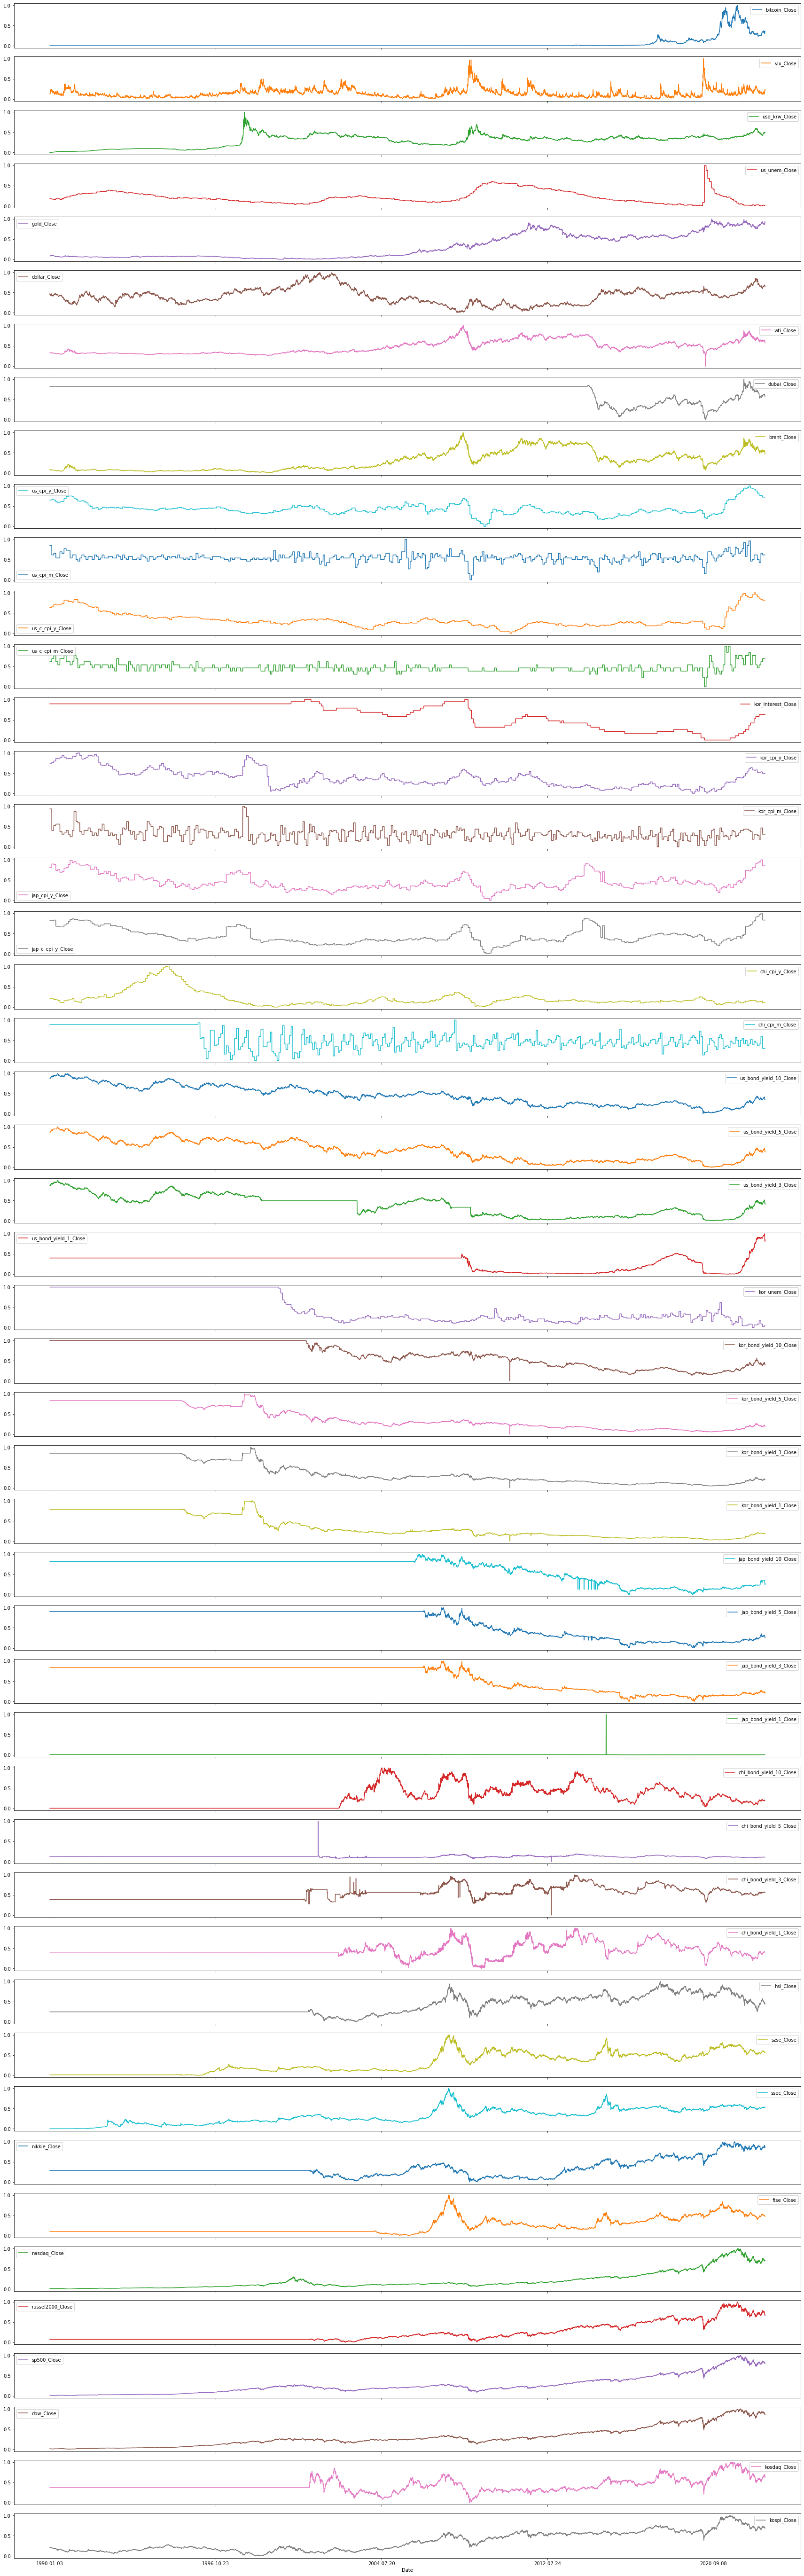

In [92]:
all_data.plot(subplots=True, figsize=(30,100))
plt.show()

In [93]:
all_data.to_csv('all_data_by_kospi.csv')

In [113]:
df_corr = all_data.corr()
df_corr = df_corr.apply(lambda x: round(x ,2))

In [141]:
df_corr

,bitcoin_Close,vix_Close,usd_krw_Close,us_unem_Close,gold_Close,dollar_Close,wti_Close,dubai_Close,brent_Close,us_cpi_y_Close,...,szse_Close,ssec_Close,nikkie_Close,ftse_Close,nasdaq_Close,russel2000_Close,sp500_Close,dow_Close,kosdaq_Close,kospi_Close
bitcoin_Close,1.00,0.06,0.21,-0.19,0.55,0.15,0.26,-0.33,0.25,0.43,...,0.45,0.39,0.76,0.59,0.84,0.78,0.78,0.74,0.71,0.61
vix_Close,0.06,1.00,0.43,0.15,0.04,0.17,-0.02,0.06,-0.02,-0.02,...,0.12,0.09,-0.17,0.08,0.03,-0.12,0.02,0.01,-0.12,-0.11
usd_krw_Close,0.21,0.43,1.00,-0.09,0.37,0.38,0.29,-0.25,0.29,-0.26,...,0.47,0.52,0.10,0.27,0.42,0.31,0.50,0.51,0.14,0.29
us_unem_Close,-0.19,0.15,-0.09,1.00,0.20,-0.49,0.18,0.16,0.20,-0.31,...,0.09,-0.05,-0.46,-0.05,-0.25,-0.23,-0.30,-0.28,-0.36,0.02
gold_Close,0.55,0.04,0.37,0.20,1.00,-0.22,0.74,-0.56,0.78,0.02,...,0.83,0.73,0.53,0.74,0.77,0.83,0.79,0.81,0.44,0.93
dollar_Close,0.15,0.17,0.38,-0.49,-0.22,1.00,-0.48,-0.22,-0.47,0.06,...,-0.19,-0.06,0.25,-0.11,0.21,0.07,0.21,0.18,0.32,-0.21
wti_Close,0.26,-0.02,0.29,0.18,0.74,-0.48,1.00,-0.05,0.99,0.14,...,0.72,0.65,0.17,0.52,0.41,0.50,0.48,0.52,0.16,0.72
dubai_Close,-0.33,0.06,-0.25,0.16,-0.56,-0.22,-0.05,1.00,-0.09,0.25,...,-0.52,-0.54,-0.63,-0.58,-0.64,-0.69,-0.64,-0.66,-0.51,-0.61
brent_Close,0.25,-0.02,0.29,0.20,0.78,-0.47,0.99,-0.09,1.00,0.11,...,0.72,0.65,0.17,0.52,0.43,0.52,0.49,0.54,0.16,0.74
us_cpi_y_Close,0.43,-0.02,-0.26,-0.31,0.02,0.06,0.14,0.25,0.11,1.00,...,-0.09,-0.13,0.33,0.06,0.23,0.19,0.19,0.14,0.26,0.05


In [168]:
# series 이므로 df로 변환한다

s = df_corr.kospi_Close

# 0.7 이상 추출
cor_vis = pd.DataFrame(s[s > 0.7].sort_values(ascending=False))#, columns=['corr'])
cor_vis.style.background_gradient(cmap='viridis')

,kospi_Close
kospi_Close,1.000000
gold_Close,0.930000
russel2000_Close,0.900000
hsi_Close,0.890000
dow_Close,0.870000
szse_Close,0.860000
sp500_Close,0.840000
ftse_Close,0.820000
nasdaq_Close,0.820000
ssec_Close,0.800000


In [170]:
# -0.7 이상 추출

cor_vis = pd.DataFrame(s[s < -0.7].sort_values(ascending=True))
cor_vis.style.background_gradient(cmap='viridis')

,kospi_Close
jap_bond_yield_5_Close,-0.910000
jap_bond_yield_3_Close,-0.900000
kor_bond_yield_10_Close,-0.860000
jap_bond_yield_10_Close,-0.850000
kor_interest_Close,-0.840000
us_bond_yield_10_Close,-0.800000
kor_bond_yield_5_Close,-0.770000
us_bond_yield_5_Close,-0.760000
kor_bond_yield_3_Close,-0.750000
kor_bond_yield_1_Close,-0.750000


In [119]:
plt.figure(figsize=(10,30))
sns.heatmap(df_corr['kospi_Close'], annot=True, fmt='.2f', cmap='Blues')

IndexError: Inconsistent shape between the condition and the input (got (48, 1) and (48,))

<Figure size 720x2160 with 0 Axes>

In [ ]:
# 날짜 다른 두 컬럼 간 상관관계 및 그래프 도출

def get_corr(lst, standard_value):
    for i in lst:
        if str(i) != str(standard_value):
            oneone = pd.merge(i, standard_value, how = 'right', left_on = 'Date', right_on = 'Date')
            oneone = oneone.set_index('Date')
            oneone.fillna(method = 'ffill', inplace = True)
            oneone.fillna(method = 'bfill', inplace = True)
            minmax_scaled = minmax_scaler.fit_transform(oneone.values)
            df = pd.DataFrame(data = minmax_scaled, columns = oneone.columns, index = oneone.index)
            print(df)
            print(df.corr())
        return df

#             df.plot(figsize=(20,5))
#             plt.title(f'{standard_value.columns[1]}_{i.columns[1]}')
#             plt.show()
#             print('🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟')
#             print('')
#             print('')

In [ ]:
get_corr(variables, kospi)

In [ ]:
# KOSPI와 각 FEATURE간 상관관계 도출 및 그래프 그리기

def get_corr2(lst):
    for i in lst:
        if str(i) != str(kospi):
            oneone = pd.merge(kospi, i, how = 'right', left_on = 'Date', right_on = 'Date')
            oneone = oneone.set_index('Date')
            oneone.fillna(method = 'ffill', inplace = True) 
            minmax_scaled = minmax_scaler.fit_transform(oneone.values)
            f'df_{i.columns[1]}' = pd.DataFrame(data = minmax_scaled, columns = oneone.columns, index = oneone.index)
#             print(df)
#             print(df.corr())
        
            df.plot(figsize=(10,5))
            plt.title(f'kospi_{i.columns[1]}')
            plt.show()
            print('🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟🍟')
            print('')
            print('')
                      

### Correlation over 0.7

In [ ]:

cor_over_70 = [dow, sp500, russel2000, nasdaq, ftse, nikkie, ssec, szse, hsi, jap_bond_yield_10, 
               kor_bond_yield_1, kor_bond_yield_3, kor_bond_yield_5, kor_bond_yield_10, kor_interest, 
               us_bond_yield_3, us_bond_yield_5, us_bond_yield_10, brent, wti, bitcoin, gold]

'''
dow                  90.01.02 
sp500                90.01.02 
russel2000               01.01.03 
nasdaq               90.01.02 
ftse                     04.03.05
nikkie                   01.01.05 
ssec                   90.12.20 
szse                   95.01.24 
hsi                      00.12.05 
jap_bond_yield_10        06.02.07
kor_bond_yield_1       95.05.03
kor_bond_yield_3       95.05.03
kor_bond_yield_5       95.05.03
kor_bond_yield_10        00.10.26
kor_interest         99.05
us_bond_yield_3      90.01.08
us_bond_yield_5      90.01.08
us_bond_yield_10     90.01.08
brent                90.01.02
wti                  90.01.02
# bitcoin                  10.07.18
gold                 90.01.02

'''

# Modeling

## 정상성 확인

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

In [ ]:
for i in data:
    plot_acf(data[i], lags=50)
    plt.title('ACF for %s' % i)
    plt.show()

for i in data:
    plot_pacf(data[i], lags=50)
    plt.title('PACF for %s' % i)
    plt.show()

In [ ]:
def adf(time_series):
    result = adfuller(time_series.values)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

for i in data:
    print('--Test statistic for %s' % i)
    adf(data[i])

---

## Univariate Time Series

### Auto ARIMA (Single Time Series)

In [ ]:
import pmdarima as pm
from pmdarima.arima import ndiffs

In [ ]:
kospi.set_index('Date', inplace=True)
kospi.index = pd.to_datetime(kospi.index)
kospi

In [ ]:
# kospi_t.fillna(method='ffill', inplace=True)
# kospi_t

In [ ]:
y = kospi[['kospi_Close']].iloc[-100:]
y

In [ ]:
# 몇 차수가 필요하지? 

ndiffs(y)

In [ ]:
y_train = y['kospi_Close'][ : int(0.7*len(y))]
y_test = y['kospi_Close'][int(0.7*len(y)) : ]

In [ ]:
y_test

In [ ]:
y_train.plot()
y_test.plot()

In [ ]:
# 몇 차수가 필요하니~?

kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"d = {n_diffs}")

In [ ]:
model = pm.auto_arima(y = y_train       # 데이터
                      , d = 2           # (d)차분 차수 (기본값 = none), 지정하지 않으면 실행 기간이 매우 길어질 수 있음
                      , start_p = 0     # (p)탐색 시초값 (기본값 = 2)
                      , max_p = 3       # (기본값 = 5)
                      , start_q = 0     # (q)탐색 시초값 (기본값 = 2)
                      , max_q = 3       # (기본값 = 5)
                      , m = 1           # (기본값 = 1)
                      , seasonal = False # 기본값 = True, 계절변동 ARIMA(SARIMA)에 해당시 True로 수정
                      , stepwise = True  
                      , trace=True      # stepwise로 모델을 적합할 때마다 결과를 프린트
                      )

In [ ]:
# model = pm.auto_arima(y_train, d = 1, seasonal = False, trace = True)
model.fit(y_train)

In [ ]:
print(model.summary())

In [ ]:
# plot_diagnostics 잔차 그래프로 정상성과 정규성을 만족하는지 파악

model.plot_diagnostics(figsize=(10, 6)) 
plt.show()

#### Forecasting

In [ ]:
# 모형 예측

y_pred = model.predict(n_period=len(y_test))
# y_pred = model.predict(steps=1)

In [ ]:
y_pred

In [ ]:
y_test_predict_df = pd.DataFrame({"test": y_test, "pred": y_pred})
y_predict_df = y_test_predict_df['pred']
y_predict_df

#### Model Update

In [ ]:
# model update setting

def forecast_one_step(): 
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)               
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

In [ ]:
forecasts = []
y_pred = []
pred_upper = []
pred_lower = []

for new_ob in y_test:
    fc, conf = forecast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## 모형 업데이트
    model.update(new_ob)

#### Result

In [ ]:
pd.DataFrame({"test": y_test, "pred": y_pred}).tail(20)

In [ ]:
y_test_predict_df = pd.DataFrame({"test": y_test, "pred": y_pred})
y_predict_df = y_test_predict_df['pred']
y_predict_df

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
plt.plot(y_train, label='Train')        
plt.plot(y_test, label='Test')          
plt.plot(y_predict_df, label='Prediction')   
plt.legend()
plt.show()

#### Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
def MSE(y_test, y_pred):
    return mean_squared_error(y_test, y_pred)
    
def RMSE(mse):
    return np.sqrt(mse)

def MAE(y_test, y_pred)
    return mean_absolute_error(y_test, y_pred)

def MAPE(y_test, y_pred): 
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 

In [ ]:
print('MSE: %f' % MSE)
print('RMSE: %f' % RMSE)    
print('MAE: %f' % MAE)
print('MAPE: %f' % MAPE)

In [ ]:
# lst 내에서, 가장 적게 수집된 데이터를 기준으로 concat

def concat_data(lst):
    # 최소 기간 data 추출
    df_min_len = len(lst[0])
    for _ in range(len(lst)):
        if df_min_len >= len(lst[_]):
            df_min_len = len(lst[_])
            df_min = lst[_]
    x = df_min

    for i in lst:
        if x.columns[1] == i.columns[1]:
            pass
        elif i.columns[1] == lst[0].columns[1]:
            oneone = pd.merge(lst[0], x, how = 'right', left_on = 'Date', right_on = 'Date')
            oneone.fillna(method = 'ffill', inplace = True)
        else:
            oneone = pd.merge(i, oneone, how = 'right', left_on = 'Date', right_on = 'Date')
            oneone.fillna(method = 'ffill', inplace = True)

    oneone = oneone.set_index('Date')
    minmax_scaled = minmax_scaler.fit_transform(oneone.values)
    # {main_kospi}_concat
#     main_kospi_concat = pd.DataFrame(data = minmax_scaled, columns = oneone.columns, index = oneone.index)
#     bon_yield_kospi_concat = pd.DataFrame(data = minmax_scaled, columns = oneone.columns, index = oneone.index)
#     other_kospi_concat = pd.DataFrame(data = minmax_scaled, columns = oneone.columns, index = oneone.index)
    all_feature = pd.DataFrame(data = minmax_scaled, columns = oneone.columns, index = oneone.index)
    
#     return main_kospi_concat
#     return bon_yield_kospi_concat
#     return other_kospi_concat
    return all_feature


---

### LSTM

In [ ]:
import tensorflow as tf

In [ ]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000

In [ ]:
train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [ ]:
np.array(x_train_uni).shape[-2:]

In [ ]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=np.array(x_train_uni).shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

#### Train Model

In [ ]:
EVALUATION_INTERVAL = 200
EPOCHS = 10

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50)

#### Forecasts & Visualize

In [ ]:
# Make forecasts & Visualize

for x, y in val_univariate.take(7):
    plot = show_plot([x[0].numpy(), y[0].numpy(),
                      simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
    plot.show()

---

### Prophet

https://colab.research.google.com/drive/1i9BhC6SZ1peIO8TG_uDJpn_jzsQaI7W0#scrollTo=zJ0KUF-oCNGp

In [ ]:
!pip install prophet
!pip install plotnine

In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

In [ ]:
# check total number of cells, first few rows, and descriptive stats 
def descriptive_info(df):
#  number_of_cells = df.count(axis=0, level=None, numeric_only=False)
  # Let's check the shape of the dataset
    print('Features:', df.shape[1], ' ', 'Entries:', df.shape[0])
    print('\n\n')
    print('Printing descriptive statistics...\n\n', df.describe())

In [ ]:
# now check some basic info of our dataset
descriptive_info(df)

In [ ]:
# Let's define a function to check the type of our features and check for 
# missing values in our dataset
def missing_val(df):
  print(df.info())
  print('\n\nFeatures with missing values in descending order \n\n')
  print((df.isnull().sum()/ df.shape[0]).sort_values(ascending=False))

In [ ]:
# Now apply the missing_val function
missing_val(df)

In [ ]:
# This Function is to prepare the dataset for Fb Prophet
#ds, save the name of date column as ds
#y, save the name of column we are interested in as y
def prepare_data(df, ds, y):
    '''
    input: df = dataframe
    ds = date column
    y = prediction column
    '''
    df = df[[ds, y]]
    df = df.rename(columns={ds: "ds", y: "y"}) #now it is usable for FB Prophet, let's check the new file
    print('The series is ready for use.\n')
    return df

In [ ]:
# Use the function to prepare the dataframe to feed into fbprophet
# df = series, ds = the time variable name from the dataframe (string), 
# y = intended variable name for prediction from the dataframe, (string)
df2 = prepare_data(df, ds = 'Date', y = 'Price') 
print(df2.head())
print('')
print('The length of your series is: ', len(df2))

In [ ]:
## function to Plot the prepared data
def _fig_plot(df, X, Y):
  ''' Function plots the data. requires to provide dataframe in the
  format of date as ds, observation as y, Preset other variables e.g., axis name
  '''
  df.plot(x = X, y = Y, figsize=Figsize, label = Label)
  plt.xlabel(xAxisLabel, fontsize = 16)
  plt.ylabel(yAxisLabel, fontsize = 16)
  plt.legend()
  plt.title(Title, fontsize = 20)
  ax = plt.gca().get_xaxis()

In [ ]:
# provide variable names and other required inputs to plot using the function
X = 'ds'
Y = 'y'
Label = "price"
Figsize = (16,8)
Title = "Monthly Gold Price Data"
xAxisLabel = 'Time (Month)'
yAxisLabel = 'Price ($)'
_fig_plot(df2, X, Y)

In [ ]:
train = df2.copy()

In [ ]:
# let's predict now
# instantiate the model and fit the timeseries

prophet = Prophet(daily_seasonality= 'auto',
                  weekly_seasonality='auto',
                  yearly_seasonality= False, 
                  growth='linear', 
                  changepoints=None, 
                  n_changepoints=25, 
                  changepoint_range=0.8,  
                  holidays=None, 
                  seasonality_prior_scale=20, 
#                  holidays_prior_scale=10, 
                  changepoint_prior_scale=0.05, 
                  mcmc_samples=0, 
                  interval_width=0.8, 
                  uncertainty_samples=1000, 
                  stan_backend=None)
prophet.add_seasonality(name='yearly', period=365, fourier_order=3, 
                      mode = 'multiplicative')
prophet.fit(train)


# create a future data frame 
future = prophet.make_future_dataframe(periods=12, freq = 'MS')
forecast = prophet.predict(future)

In [ ]:
# summarize the forecast
print('Printing outputs from Prophet prediction...\n', forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
prophet.plot(forecast)
plt.show()

In [ ]:
# Python
plot_plotly(prophet, forecast)

In [ ]:
# plot the components of forcasted series
fig2 = prophet.plot_components(forecast)
plt.show()

#### Evaluation

In [ ]:
# use built in fbprophet evaluation function and metrix
evaluation_model = cross_validation(prophet, initial='400 days', period='60 days', horizon = '30 days')

In [ ]:
evaluation_metrix = performance_metrics(evaluation_model)
evaluation_metrix.sort_values('rmse').head(5)

***

## Multivariate Time Series

Make Multivariate Data From Kospi Period
- 코스피 데이터 최대 활용 목적

In [ ]:
for i in variables:
    print(i.info())

In [ ]:
'''
kospi 기준으로 concat
'''

def concat_data(lst, x):
    for i in lst:
        if i.columns[1] == x.columns[1]:
            pass
        else:
            oneone = pd.merge(i, x, how = 'right', left_on = 'Date', right_on = 'Date')
            oneone.fillna(method = 'bfill', inplace = True)
            oneone.fillna(method = 'ffill', inplace = True)
            
            x = oneone
            
    oneone = oneone.set_index('Date')
    minmax_scaled = minmax_scaler.fit_transform(oneone.values)
    df = pd.DataFrame(data = minmax_scaled, columns = oneone.columns, index = oneone.index)
    
    return df


In [ ]:
all_data = concat_data(variables, kospi)
all_data

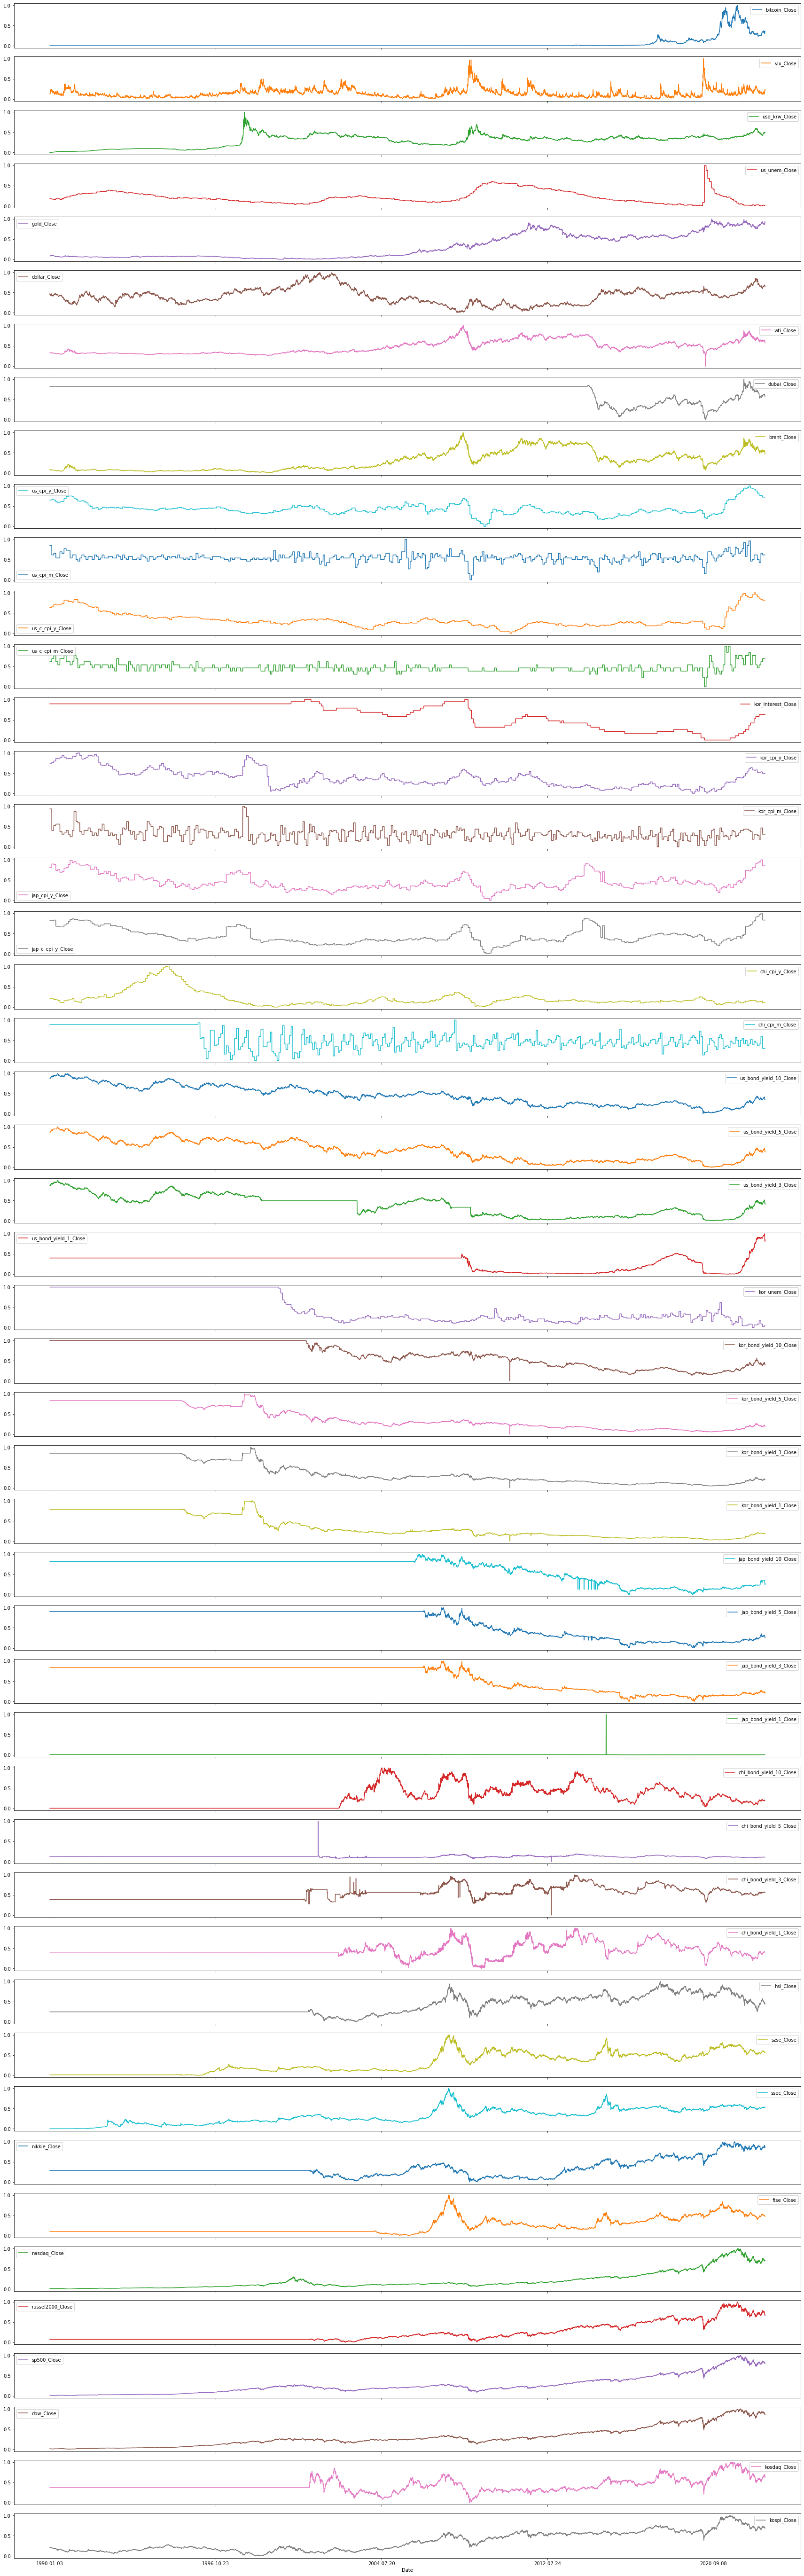

In [91]:
all_data.plot(subplots=True, figsize=(30,100))
plt.show()

Make Multivariate Data From Low Length Period
- NULL 값 임의 처리 최소화 목적

In [ ]:
# lst 내에서, 기간이 가장 짧게 수집된 데이터를 기준으로 concat

def concat_data_lower_length(lst):
    # 최소 기간 data 추출
    df_min = lst[0]
    for _ in range(len(lst)):
        if len(lst[_]) < 500:
            pass
        elif len(lst[_]) <= len(df_min):
            df_min = lst[_]
    x = df_min

    for i in lst:
        if i.columns[1] == x.columns[1]:
            pass
        elif i.columns[1] == lst[0].columns[1]:
            oneone = pd.merge(lst[0], x, how = 'right', left_on = 'Date', right_on = 'Date')
            oneone.fillna(method = 'ffill', inplace = True)
            oneone.fillna(method = 'bfill', inplace = True)
        else:
            oneone = pd.merge(i, oneone, how = 'right', left_on = 'Date', right_on = 'Date')
            oneone.fillna(method = 'ffill', inplace = True)
            oneone.fillna(method = 'bfill', inplace = True)

    oneone = oneone.set_index('Date')
    minmax_scaled = minmax_scaler.fit_transform(oneone.values)
    df = pd.DataFrame(data = minmax_scaled, columns = oneone.columns, index = oneone.index)

#     return x
    return df

In [ ]:
low_period_data = concat_data_lower_length(variables)
low_period_data.plot(subplots=True, figsize=(30,100))
plt.show()

---

### 다중공선성 확인

https://blog.naver.com/sanghan1990/221121607688

https://ysyblog.tistory.com/171

#### 분산팽창지수 (VIF : Variance Inflation Factor)

https://zephyrus1111.tistory.com/66

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
low_period_data.columns

In [ ]:
def listToString(str_list):
    result = ""
    for s in str_list:
        result += s + " "
    return result.strip()

str_list = ['bitcoin_Close', 'vix_Close', 'usd_krw_Close', 'us_unem_Value',
             'gold_Close', 'dollar_Close', 'wti_Close', 'brent_Close',
             'us_cpi_y_Change', 'us_cpi_m_Change', 'us_c_cpi_y_Change',
             'us_c_cpi_m_Change', 'kor_interest_Value', 'kor_cpi_y_Change',
             'kor_cpi_m_Change', 'jap_cpi_y_Change', 'jap_c_cpi_y_Change',
                'chi_cpi_y_Change', 'chi_cpi_m_Change', 'us_bond_yield_10_Close',
                'us_bond_yield_5_Close', 'us_bond_yield_3_Close',
                'us_bond_yield_1_Close', 'kor_bond_yield_10_Close',
                'kor_bond_yield_5_Close', 'kor_bond_yield_3_Close',
                'kor_bond_yield_1_Close', 'jap_bond_yield_10_Close',
                'jap_bond_yield_5_Close', 'jap_bond_yield_3_Close',
                'jap_bond_yield_1_Close', 'chi_bond_yield_10_Close',
                'chi_bond_yield_5_Close', 'chi_bond_yield_3_Close',
                'chi_bond_yield_1_Close', 'hsi_Close', 'szse_Close', 'ssec_Close',
                'nikkie_Close', 'ftse_Close', 'nasdaq_Close', 'russel2000_Close',
                'sp500_Close', 'dow_Close', 'kosdaq_Close', 'kospi_Close','dubai_Close']
result = listToString(str_list)
print(result)

In [ ]:
def standardize_var(x):
    mean = np.mean(x)
    std = np.sqrt(np.sum(np.square(x-mean))/(len(x)-1))
    return ((x-mean)/std)/np.sqrt(len(x)-1)
 
sdf = low_period_data.apply(standardize_var) ## 데이터 표준화
sdf_X = sdf[['bitcoin_Close', 'vix_Close', 'usd_krw_Close', 'us_unem_Value',
             'gold_Close', 'dollar_Close', 'wti_Close', 'brent_Close',
             'us_cpi_y_Change', 'us_cpi_m_Change', 'us_c_cpi_y_Change',
             'us_c_cpi_m_Change', 'kor_interest_Value', 'kor_cpi_y_Change',
             'kor_cpi_m_Change', 'jap_cpi_y_Change', 'jap_c_cpi_y_Change',
             'chi_cpi_y_Change', 'chi_cpi_m_Change', 'us_bond_yield_10_Close',
             'us_bond_yield_5_Close', 'us_bond_yield_3_Close',
             'us_bond_yield_1_Close', 'kor_bond_yield_10_Close',
             'kor_bond_yield_5_Close', 'kor_bond_yield_3_Close',
             'kor_bond_yield_1_Close', 'jap_bond_yield_10_Close',
             'jap_bond_yield_5_Close', 'jap_bond_yield_3_Close',
             'jap_bond_yield_1_Close', 'chi_bond_yield_10_Close',
             'chi_bond_yield_5_Close', 'chi_bond_yield_3_Close',
             'chi_bond_yield_1_Close', 'hsi_Close', 'szse_Close', 'ssec_Close',
             'nikkie_Close', 'ftse_Close', 'nasdaq_Close', 'russel2000_Close',
             'sp500_Close', 'dow_Close', 'kosdaq_Close', 'kospi_Close','dubai_Close']]

corr = np.array(sdf_X.corr()) ## 상관계수 행렬
corr_inv = np.linalg.inv(corr) ## 상관계수행렬의 역행렬
 
## standardized된 변수들로 이루어진 선형 회귀모형은 절편항이 없다. 
## 따라서 절편항은 제외한다. 포함시켜도 절편항이 0에 가까운 값으로 추정된다.
fit = ols('kospi_Close ~ bitcoin_Close + vix_Close + usd_krw_Close \
                       + us_unem_Value + gold_Close + dollar_Close + wti_Close + brent_Close + us_cpi_y_Change \
                       + us_cpi_m_Change + us_c_cpi_y_Change + us_c_cpi_m_Change + kor_interest_Value \
                       + kor_cpi_y_Change + kor_cpi_m_Change + jap_cpi_y_Change + jap_c_cpi_y_Change \
                       + chi_cpi_y_Change + chi_cpi_m_Change + us_bond_yield_10_Close + us_bond_yield_5_Close \
                       + us_bond_yield_3_Close + us_bond_yield_1_Close + kor_bond_yield_10_Close + kor_bond_yield_5_Close \
                       + kor_bond_yield_3_Close + kor_bond_yield_1_Close + jap_bond_yield_10_Close + jap_bond_yield_5_Close \
                       + jap_bond_yield_3_Close + jap_bond_yield_1_Close + chi_bond_yield_10_Close + chi_bond_yield_5_Close \
                       + chi_bond_yield_3_Close + chi_bond_yield_1_Close + hsi_Close + szse_Close + ssec_Close + nikkie_Close \
                       + ftse_Close + nasdaq_Close + russel2000_Close + sp500_Close + dow_Close + kosdaq_Close + kospi_Close \
                       + dubai_Close', data = low_period_data).fit()

In [ ]:
## 모형 정의(실제적합은 일어나지 않는다.)
model = ols('kospi_Close ~ bitcoin_Close + vix_Close + usd_krw_Close \
                       + us_unem_Value + gold_Close + dollar_Close + wti_Close + brent_Close + us_cpi_y_Change \
                       + us_cpi_m_Change + us_c_cpi_y_Change + us_c_cpi_m_Change + kor_interest_Value \
                       + kor_cpi_y_Change + kor_cpi_m_Change + jap_cpi_y_Change + jap_c_cpi_y_Change \
                       + chi_cpi_y_Change + chi_cpi_m_Change + us_bond_yield_10_Close + us_bond_yield_5_Close \
                       + us_bond_yield_3_Close + us_bond_yield_1_Close + kor_bond_yield_10_Close + kor_bond_yield_5_Close \
                       + kor_bond_yield_3_Close + kor_bond_yield_1_Close + jap_bond_yield_10_Close + jap_bond_yield_5_Close \
                       + jap_bond_yield_3_Close + jap_bond_yield_1_Close + chi_bond_yield_10_Close + chi_bond_yield_5_Close \
                       + chi_bond_yield_3_Close + chi_bond_yield_1_Close + hsi_Close + szse_Close + ssec_Close + nikkie_Close \
                       + ftse_Close + nasdaq_Close + russel2000_Close + sp500_Close + dow_Close + kosdaq_Close + kospi_Close \
                       + dubai_Close', data = low_period_data)
 
variables = []
reg_coef = []
vif = []
for i in range(len(model.exog_names)):
    col_name = model.exog_names[i]
    variables.append(col_name)
    reg_coef.append(model.fit().params[col_name])
    vif.append(variance_inflation_factor(model.exog, i))
    
df_res = pd.DataFrame()
df_res['Variable'] = variables
df_res['Estimate'] = reg_coef
df_res['VIF'] = vif

In [ ]:
df_res

#### PCA

https://jalynne-kim.medium.com/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%82%AC%EC%9D%B4%EC%96%B8%EC%8A%A4-%EC%A3%BC%EC%84%B1%EB%B6%84-%EB%B6%84%EC%84%9D-pca-principal-component-analysis-%EA%B3%BC-biplot-%EA%B0%9C%EB%85%90%EA%B3%BC-%EC%82%AC%EB%A1%80-%EB%A0%88%EB%93%9C%EC%99%80%EC%9D%B8-%EB%8D%B0%EC%9D%B4%ED%84%B0-437283592031

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# 표준화
scaler = StandardScaler()
A = scaler.fit_transform(low_period_data)
print("\n Standardized Data: \n", A)

In [ ]:
# projection, pca 매트릭스 만들기
pca_low_period_data = PCA()
pca_low_period_data.fit(A)

print("\n Eigenvectors: \n", pca_low_period_data.components_)
print("\n Eigenvalues: \n",pca_low_period_data.explained_variance_)

B = pca_low_period_data.transform(A)
print("\n Projected Data: \n", B)

PCA 시각화 (Biplot)

In [ ]:
def biplot(score, coeff, pcax, pcay, labels=None):
    pca1 = pcax - 1
    pca2 = pcay - 1
    xs = score[:, pca1]
    ys = score[:, pca2]
    n = score.shape[1]
    scalex = 1.0 / (xs.max()- xs.min())
    scaley = 1.0 / (ys.max()- ys.min())
    plt.figure(figsize=(30,30))
    plt.scatter(xs * scalex, ys * scaley)
    
    for i in range(n):
        plt.arrow(0, 0, coeff[i, pca1], coeff[i, pca2],color = 'r', alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,pca1] * 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,pca1] * 1.15, coeff[i,pca2] * 1.15, labels[i], color='g', ha='center', va='center')
    
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()

In [ ]:
biplot(B, pca_low_period_data.components_, 1, 2, labels = low_period_data.columns)

컬럼수 변경하여 PCA 하면 다른 결과가 나옴

---

### XGBoost

https://sosoeasy.tistory.com/388

https://dacon.io/competitions/official/235736/codeshare/2877
https://magoker.tistory.com/106

In [ ]:
data = np.log(other_kospi_concat).diff()
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)
data

In [ ]:
data.plot(figsize=(20,10))

In [ ]:
data

In [ ]:
obs = 50
X_train, X_test = data[0:-obs], data[-obs:]

print(X_train.shape)
print(X_test.shape)

In [ ]:
X_test.plot(figsize=(12, 6))#, linewidth=3)
plt.show()

In [ ]:
X_train.info()

In [ ]:
from statsmodels.tsa.api import VAR

model_var = VAR(endog=X_train)
res = model_var.select_order(6)
res.summary()

In [ ]:
model_fit = model_var.fit(maxlags=3, ic='aic')
model_fit.summary()

In [ ]:
X_test.shape

In [ ]:
lag_order = model_fit.k_ar
print(lag_order)

In [ ]:
model_fit.forecast(X_train.values[-lag_order:], steps=5)

In [ ]:
model_fit.plot_forecast(steps=10)

In [ ]:
pred = model_fit.forecast(X_train.values[-lag_order:], steps=obs)
pred = pd.DataFrame(pred, index=X_test.index, columns=X_test.columns + '_pred')
pred

In [ ]:
# VAR Forecast evaluation

In [ ]:
all_data_kospi = concat_data(variables, kospi)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX # provides ARMA, ARIMA, SARIMA models
from statsmodels.tsa.stattools import adfuller # test for stationarity using dicky-fuller test
plt.rcParams['figure.figsize']=(10, 6)

time series를 regression 문제로 변환하기 위해 시간 변수 추가 필요⭐

In [ ]:
main_kospi_concat.dropna(inplace=True)
bon_yield_kospi_concat.dropna(inplace=True)
other_kospi_concat.dropna(inplace=True)
all_concat.dropna(inplace=True)

In [ ]:
# main_kospi_concat 학습과 테스트 데이터 분리

split1 = int(len(main_kospi_concat) * 0.7)

X_train1 = main_kospi_concat[:split1]
X_train1.drop('kospi_Close', axis=1, inplace=True)
X_test1 = main_kospi_concat[split1:]
X_test1.drop('kospi_Close', axis=1, inplace=True)

y_train1 = main_kospi_concat[:split1]['kospi_Close']
y_test1 = main_kospi_concat[split1:]['kospi_Close']

# 나중에 예측값과 비교하기 위해 test 데이터 복제본 저장
main_kospi_concat_orig = main_kospi_concat[split1:]
main_kospi_concat_orig = main_kospi_concat_orig[['kospi_Close']]



# bon_yield_kospi_concat 학습과 테스트 데이터 분리

split2 = int(len(bon_yield_kospi_concat) * 0.7)

X_train2 = bon_yield_kospi_concat[:split2]
X_train2.drop('kospi_Close', axis=1, inplace=True)
X_test2 = bon_yield_kospi_concat[split2:]
X_test2.drop('kospi_Close', axis=1, inplace=True)

y_train2 = bon_yield_kospi_concat[:split2]['kospi_Close']
y_test2 = bon_yield_kospi_concat[split2:]['kospi_Close']

# 나중에 예측값과 비교하기 위해 test 데이터 복제본 저장
bon_yield_kospi_concat_orig = other_kospi_concat[split2:]
bon_yield_kospi_concat_orig = bon_yield_kospi_concat_orig[['kospi_Close']]



# other_kospi_concat 학습과 테스트 데이터 분리

split3 = int(len(other_kospi_concat) * 0.7)

X_train3 = other_kospi_concat[:split3]
X_train3.drop('kospi_Close', axis=1, inplace=True)
X_test3 = other_kospi_concat[split3:]
X_test3.drop('kospi_Close', axis=1, inplace=True)

y_train3 = other_kospi_concat[:split3]['kospi_Close']
y_test3 = other_kospi_concat[split3:]['kospi_Close']

# 나중에 예측값과 비교하기 위해 test 데이터 복제본 저장
other_kospi_concat_orig = other_kospi_concat[split3:]
other_kospi_concat_orig = other_kospi_concat_orig[['kospi_Close']]


# all_concat 학습과 테스트 데이터 분리

split4 = int(len(all_concat) * 0.7)

X_train4 = all_concat[:split4]
X_train4.drop('kospi_Close', axis=1, inplace=True)
X_test4 = all_concat[split4:]
X_test4.drop('kospi_Close', axis=1, inplace=True)

y_train4 = all_concat[:split4]['kospi_Close']
y_test4 = all_concat[split4:]['kospi_Close']

# 나중에 예측값과 비교하기 위해 test 데이터 복제본 저장
all_concat_orig = all_concat[split4:]
all_concat_orig = all_concat_orig[['kospi_Close']]

In [ ]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
# from xgboost import XGBClassifier

In [ ]:
xgb_model1 = xgb.XGBRegressor(n_estimators=1000)
xgb_model1.fit(X_train1, y_train1, eval_set=[(X_test1, y_test1)], early_stopping_rounds=50, verbose=False)

xgb_model2 = xgb.XGBRegressor(n_estimators=1000)
xgb_model2.fit(X_train2, y_train2, eval_set=[(X_test2, y_test2)], early_stopping_rounds=50, verbose=False)

xgb_model3 = xgb.XGBRegressor(n_estimators=1000)
xgb_model3.fit(X_train3, y_train3, eval_set=[(X_test3, y_test3)], early_stopping_rounds=50, verbose=False)

xgb_model4 = xgb.XGBRegressor(n_estimators=1000)
xgb_model4.fit(X_train4, y_train4, eval_set=[(X_test4, y_test4)], early_stopping_rounds=50, verbose=False)


# 주요하게 적용하는 변수 그래프
print(plot_importance(xgb_model1, height=0.8, title = 'main_kospi_feature_importance'))
print(plot_importance(xgb_model2, height=0.8, title = 'bond_yield_kospi_feature_importance'))
print(plot_importance(xgb_model3, height=0.8, title = 'other_kospi_feature_importance'))
print(plot_importance(xgb_model4, height=0.8, title = 'all_kospi_feature_importance'))

In [ ]:
x

In [ ]:
pred1 = xgb_model1.predict(X_test1)
pred2 = xgb_model2.predict(X_test2)
pred3 = xgb_model3.predict(X_test3)
pred4 = xgb_model4.predict(X_test4)

In [ ]:
# 실제 값과 예측 값을 하나의 DataFrame으로 만들고 visualize
# 전체 feature 학습

result1 = pd.concat([y_test1.reset_index(), pd.DataFrame(pred1, columns=['main_kospi_xgboost_pred'])], axis = 1, ignore_index = False)
result1 = result1.set_index('Date')
result1.plot(figsize=(20,10))

result2 = pd.concat([y_test2.reset_index(), pd.DataFrame(pred2, columns=['bond_yield_kospi_xgboost_pred'])], axis = 1, ignore_index = False)
result2 = result2.set_index('Date')
result2.plot(figsize=(20,10))

result3 = pd.concat([y_test3.reset_index(), pd.DataFrame(pred3, columns=['other_kospi_xgboost_pred'])], axis = 1, ignore_index = False)
result3 = result3.set_index('Date')
result3.plot(figsize=(20,10))

result4 = pd.concat([y_test4.reset_index(), pd.DataFrame(pred4, columns=['all_feature_xgboost_pred'])], axis = 1, ignore_index = False)
result4 = result4.set_index('Date')
result4.plot(figsize=(20,10))

In [ ]:
print(result3[-50:].plot(figsize=(20,5)))
print(result4[-50:].plot(figsize=(20,5)))

In [ ]:
# 중요 변수 3위 feature만 가지고 학습

X_train1_ = X_train1[['hsi_Close', 'szse_Close', 'nikkie_Close']]
X_test1_ = X_test1[['hsi_Close', 'szse_Close', 'nikkie_Close']]

# X_train2 = X_train2[]
# X_test2 = X_test2[]

# X_train3 = X_train3[]
# X_test3 = X_test3[]

# X_train4 = X_train4[]
# X_test4 = X_test4[]


xgb_model1.fit(X_train1_, y_train1, eval_set=[(X_test1_, y_test1)], early_stopping_rounds=50, verbose=False)
# xgb_model2.fit(X_train2, y_train2, eval_set=[(X_test2, y_test2)], early_stopping_rounds=50, verbose=False)
# xgb_model3.fit(X_train3, y_train3, eval_set=[(X_test3, y_test3)], early_stopping_rounds=50, verbose=False)
# xgb_model4.fit(X_train4, y_train4, eval_set=[(X_test4, y_test4)], early_stopping_rounds=50, verbose=False)

In [ ]:
pred1_ = xgb_model1.predict(X_test1_)
# pred2 = xgb_model2.predict(X_test2)
# pred3 = xgb_model3.predict(X_test3)
# pred4 = xgb_model4.predict(X_test4)

In [ ]:
result1_ = pd.concat([y_test1.reset_index(), pd.DataFrame(pred1_, columns=['main_kospi_xgboost_feature_select_pred'])], axis = 1, ignore_index = False)
result1_ = result1_.set_index('Date')
result1_.plot(figsize=(20,10))

In [ ]:
result1_[-30:].plot()

#### Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
#Calculate mean absolute error

print('==============main_kospi================')
mae1 = mean_absolute_error(y_test1, result1['main_kospi_xgboost_pred'])
print('MAE: %f' % mae1)

#Calculate mean squared error and root mean squared error
mse1 = mean_squared_error(y_test1, result1['main_kospi_xgboost_pred'])
print('MSE: %f' % mse1)

rmse1 = np.sqrt(mse1)
print('RMSE: %f' % rmse1)
print('')
print('')


print('==============bond_yield_kospi================')
mae2 = mean_absolute_error(y_test2, result2['bond_yield_kospi_xgboost_pred'])
print('MAE: %f' % mae2)

#Calculate mean squared error and root mean squared error
mse2 = mean_squared_error(y_test2, result2['bond_yield_kospi_xgboost_pred'])
print('MSE: %f' % mse2)

rmse2 = np.sqrt(mse2)
print('RMSE: %f' % rmse2)
print('')
print('')


print('==============other_kospi================')
mae3 = mean_absolute_error(y_test3, result3['other_kospi_xgboost_pred'])
print('MAE: %f' % mae3)

#Calculate mean squared error and root mean squared error
mse3 = mean_squared_error(y_test3, result3['other_kospi_xgboost_pred'])
print('MSE: %f' % mse3)

rmse3 = np.sqrt(mse3)
print('RMSE: %f' % rmse3)
print('')
print('')


print('==============all_feature================')
mae4 = mean_absolute_error(y_test4, result4['all_feature_xgboost_pred'])
print('MAE: %f' % mae4)

#Calculate mean squared error and root mean squared error
mse4 = mean_squared_error(y_test4, result4['all_feature_xgboost_pred'])
print('MSE: %f' % mse4)

rmse4 = np.sqrt(mse4)
print('RMSE: %f' % rmse4)


In [ ]:
#Calculate mean absolute error

print('==============main_kospi================')
mae1 = mean_absolute_error(y_test1, result1_['main_kospi_xgboost_feature_select_pred'])
print('MAE: %f' % mae1)

#Calculate mean squared error and root mean squared error
mse1 = mean_squared_error(y_test1, result1_['main_kospi_xgboost_feature_select_pred'])
print('MSE: %f' % mse1)

rmse1 = np.sqrt(mse1)
print('RMSE: %f' % rmse1)
print('')
print('')


# print('==============bond_yield_kospi================')
# mae2 = mean_absolute_error(y_test2, result2['bond_yield_kospi_xgboost_pred'])
# print('MAE: %f' % mae2)

# #Calculate mean squared error and root mean squared error
# mse2 = mean_squared_error(y_test2, result2['bond_yield_kospi_xgboost_pred'])
# print('MSE: %f' % mse2)

# rmse2 = np.sqrt(mse2)
# print('RMSE: %f' % rmse2)
# print('')
# print('')


# print('==============other_kospi================')
# mae3 = mean_absolute_error(y_test3, result3['other_kospi_xgboost_pred'])
# print('MAE: %f' % mae3)

# #Calculate mean squared error and root mean squared error
# mse3 = mean_squared_error(y_test3, result3['other_kospi_xgboost_pred'])
# print('MSE: %f' % mse3)

# rmse3 = np.sqrt(mse3)
# print('RMSE: %f' % rmse3)
# print('')
# print('')


# print('==============all_feature================')
# mae4 = mean_absolute_error(y_test4, result4['all_feature_xgboost_pred'])
# print('MAE: %f' % mae4)

# #Calculate mean squared error and root mean squared error
# mse4 = mean_squared_error(y_test4, result4['all_feature_xgboost_pred'])
# print('MSE: %f' % mse4)

# rmse4 = np.sqrt(mse4)
# print('RMSE: %f' % rmse4)

중요 변수 선택 전
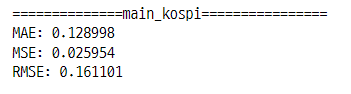

중요 변수 선택 후
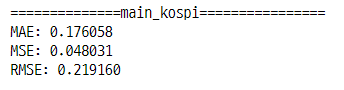

#### Feature Importance

In [ ]:
import xgboost

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [ ]:
df_kospi_cor.info()

In [ ]:
# main.iloc[:,1:].astype(dtype='float64')

In [ ]:
# pip install xgboost

In [ ]:

# df 컬럼 위치 바꿔서 y값 조정

X = df_kospi_cor.iloc[:,2:]
y = df_kospi_cor['kospi_Close']

In [ ]:
# train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=34)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
model = XGBClassifier() # booster='gbtree', importance_type='gain')
model.fit(X,y)
model.feature_importances_

In [ ]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(50,50))

axes = [ax for row_axes in axes for ax in row_axes]

xgboost.plot_importance(model, importance_type='gain', title='gain', xlabel='', grid=False, ax=axes[0])
xgboost.plot_importance(model, importance_type='cover', title='cover', xlabel='', grid=False, ax=axes[1])
xgboost.plot_importance(model, importance_type='weight', title='weight', xlabel='', grid=False, ax=axes[2])
xgboost.plot_importance(model, importance_type='total_gain', title='total_gain', xlabel='', grid=False, ax=axes[3])
xgboost.plot_importance(model, importance_type='total_cover', title='total_cover', xlabel='', grid=False, ax=axes[4])

plt.tight_layout()
plt.show()

---

### LSTM

https://colab.research.google.com/drive/1lWvMZyR2vzK6uXHrxTuBuhBLrdrGl7bx#scrollTo=VmJUkyHwUHVM

In [ ]:
import tensorflow as tf

In [ ]:
all_data # = concat_data(variables, kospi)

In [ ]:
low_period_data

In [ ]:
cor_over_70 = [kospi, dow, sp500, russel2000, nasdaq, ftse, nikkie, ssec, szse, hsi, jap_bond_yield_10, 
               kor_bond_yield_1, kor_bond_yield_3, kor_bond_yield_5, kor_bond_yield_10, us_bond_yield_3, 
               us_bond_yield_5, us_bond_yield_10, brent, wti, bitcoin, gold]

main_kospi = [kospi, dow, sp500, russel2000, nasdaq, ftse, nikkie, ssec, szse, hsi]
bon_yield_kospi = [kospi, jap_bond_yield_10, kor_bond_yield_1, kor_bond_yield_3, kor_bond_yield_5, kor_bond_yield_10, us_bond_yield_3, 
                   us_bond_yield_5, us_bond_yield_10]
other_kospi = [kospi, brent, wti, bitcoin, gold]

In [ ]:
low_period_data.plot(subplots=True, figsize=(20,100))
plt.show()

#### Standardization

In [ ]:
features = low_period_data

In [ ]:
TRAIN_SPLIT = int(len(features) * 0.7)

dataset = features.values
data_mean = dataset[ : TRAIN_SPLIT].mean(axis=0)
data_std = dataset[ : TRAIN_SPLIT].std(axis=0)
dataset = (dataset - data_mean) / data_std
print(dataset)
print(dataset.shape)

In [ ]:
def multivariate_data(dataset, target, start_index, end_index, history_size, target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i - history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i + target_size])
        else:
            labels.append(target[i:i + target_size])
            
    return np.array(data), np.array(labels)

In [ ]:
int(TRAIN_SPLIT * 0.24)

In [ ]:
past_history = int(TRAIN_SPLIT * 0.24)
future_target = int(past_history * 0.1)
STEP = 6

x_train_single, y_train_single = multivariate_data(dataset, dataset[:,-2], 0, TRAIN_SPLIT, past_history,
                                                   future_target, STEP, single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:,-2], TRAIN_SPLIT, None, past_history,
                                               future_target, STEP, single_step=True)

print('Single window of past history : {}'.format(x_train_single[0].shape))

In [ ]:
print(x_train_single.shape)
print(y_train_single.shape)
print('\n')
print(x_val_single.shape)
print(y_val_single.shape)

#### Train Model

In [ ]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000
EPOCHS = 10
EVALUATION_INTERVAL = 200

In [ ]:
print(tf.__version__)

In [ ]:
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32, input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))
single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

for x, y in val_data_single.take(1):
    print(single_step_model.predict(x).shape)

single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)

def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()
    plt.show()

plot_train_history(single_step_history, 'Single Step Training and Validation Loss')

In [ ]:
# Defind function for Visualization
def create_time_steps(length):
    return list(range(-length, 0))

def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.axis('auto')
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Time-Step')
    return plt

In [ ]:
for x, y in val_data_single.take(3):
    plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                      single_step_model.predict(x)[0]], 12,
                     'Single Step Prediction')
    plot.show()

#### Evaluation

---

### VAR

https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/

https://www.kaggle.com/code/prakharprasad/time-series-vector-autoregression/notebook

In [ ]:
df = low_period_data

#### Check Stationary

In [ ]:
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.stattools import adfuller

In [ ]:
def dickey_fuller(series, title = 'Check Stationary'):
    
    '''Hypothesis Test for stationarity '''
    print(f'Augmented Dickey Fuller Test for the dataset {title}')
    
    result = adfuller(series.dropna(),autolag='AIC')
    labels = ['ADF test statistics','p-value','#lags','#observations'] # use help(adfuller) to understand why these labels are chosen
    
    outcome = pd.Series(result[0:4],index=labels)
    
    for key,val in result[4].items():
        outcome[f'critical value ({key})'] = val
        
    print(outcome.to_string()) # this will not print the line 'dtype:float64'
    
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis') # Ho is Data is not stationary, check help(adfuller)
        print('Reject the null hypothesis')
        print('Data is Stationary')
    else:
        print('Weak evidence against the Null hypothesis')
        print('Fail to reject the null hypothesis')
        print('Data has a unit root and is non stationary')

In [ ]:
for i in df.columns:
    dickey_fuller(df[i], title = i)
    print('\n')

In [ ]:
df_diff = df.diff()

In [ ]:
df_diff = df_diff.dropna()

In [ ]:
for i in df_diff.columns:
    dickey_fuller(df_diff[i], title = i)
    print('\n')

In [ ]:
len(df_diff)

#### Building Model

VAR Model Order Selection

In [ ]:
#creating the train and validation set

train = df[:int(0.8 * (len(df)))]
test = df[int(0.8 * (len(df))):]

In [ ]:
# p = [1,2,3,4,5,6,7]  # try with list of 7 p values

check_lst = []

for i in range(1, 10):
    model = VAR(train)
    results = model.fit(i)
    print(f'VAR Order {i}')
    print('AIC {}'.format(results.aic))
    print('BIC {}'.format(results.bic))
    print()
    check_lst.append(results.aic)    
    
print(check_lst.index(min(check_lst))+1)

In [ ]:
check_lst

Order 7 has the least AIC values.

In [ ]:
results = model.fit(2)
# results.summary()

#### Predict

In [ ]:
lag_order = results.k_ar
lag_order

In [ ]:
z = results.forecast(y = train.values[-lag_order:], steps = 400)
z

In [ ]:
idx = pd.date_range(start='2021-06-07', periods = 400)
df_forecast = pd.DataFrame(z, index = idx, columns = test.columns)

In [ ]:
df_forecast_compare = pd.DataFrame({'Real' : test[:400].iloc[:,4].values, 'Forecast' : df_forecast.iloc[:,4].values} 
                                   , index = idx)

In [ ]:
df_forecast_compare.plot()

#### Evaluation

In [ ]:
from statsmodels.tools.eval_measures import mse,rmse

In [ ]:
RMSE1 = rmse(test['gold_Close'][:400], df_forecast.iloc[:,4])
print(f'VAR(2) RMSE: {RMSE1:.3f}')

- VAR(2) RMSE: 0.181
- VAR(10) RMSE: 0.397

---

### SHAP